# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [1]:
import matplotlib

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

In [ ]:
# matplotlib.use('MacOSX')

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [2]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [ ]:
# % matplotlib inline
#% matplotlib notebook

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [3]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [4]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

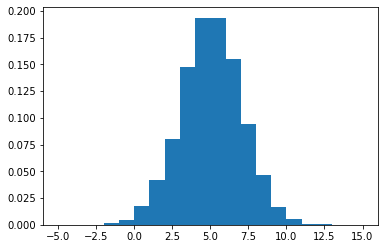

In [6]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [7]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

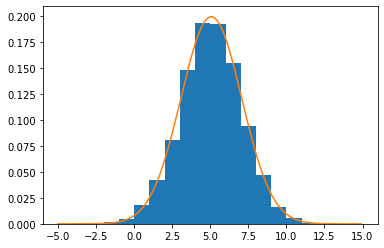

In [8]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

let's make a bit easier to read (colors, legends, axis lables, etc..)

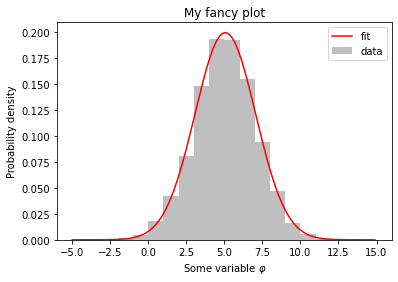

In [9]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. More changes to the plot

Our plot looks already quite good, but some of the features don't give any extra information so why not removing them

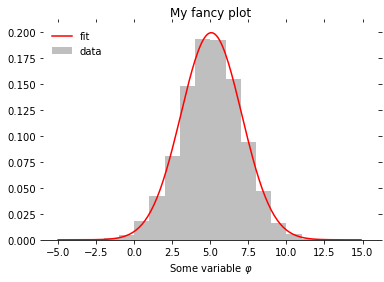

In [10]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.show()

## 5. Saving the plot as a PDF

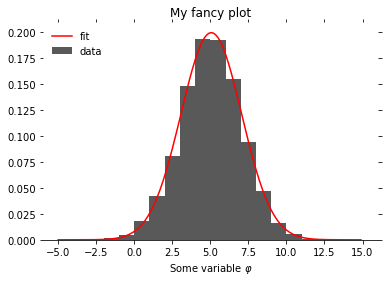

In [14]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.35', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')

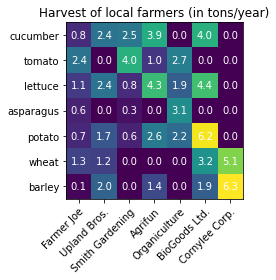

In [15]:
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

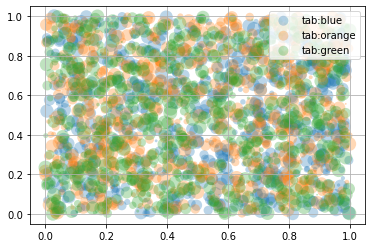

In [16]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()
